# Predicting Heart Disease Using Machine Learning

This research aims to create a machine learning model that can predict whether or not a person has heart disease based on their medical characteristics.

Methodology:
1. Problem definition
2. Data Gathering
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Provlem Definition
> Can we predict whether a patient has a heart disease based on their clinical parameters?

## 2. Data Gathering
UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/heart+Disease
Kaggle: https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> Goal: 90% accuracy


## 4. Features

Data Dictionary

* age: Displays the age of the individual.
* sex: Displays the gender of the individual using the following format :
  1 = male
  0 = female
* cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
  0 = typical angina
  1 = atypical angina
  2 = non — anginal pain
  3 = asymptotic
* trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.
* chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
* fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes
* restecg- Resting ECG : displays resting electrocardiographic results
  0 = normal
  1 = having ST-T wave abnormality
  2 = left ventricular hyperthrophy
* thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.
* exang- Exercise induced angina :
  1 = yes
  0 = no
* oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.
* slope- Slope of the peak exercise ST segment :
  0 = upsloping: better heart rate with excercise (uncommon)
  1 = flat: minimal change (typical healthy heart)
  2 = downsloping: signs of unhealthy heart
* ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
* thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising
* target : Displays whether the individual is suffering from heart disease or not :
  1 = yes
  0 = no

## Making our imports

Pandas, Matplotlib, NumPy

In [7]:
# Regular EDA and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [9]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## EDA

Our Checklist/ Goals:

1. What question are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it
4. Where are our outliers and why should we care about them?
5. How can we add, change or remove features to get more out of our data?

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [14]:
# We want to find out how many classes we have
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

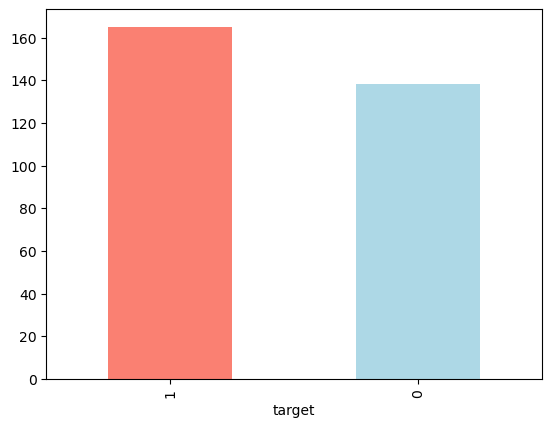

In [16]:
# This seems like we have a relatively balanced problem,because we have quite a similar amount of examples in both classes

df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
# Do we have any missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

We want to start comparing the different features to the target attribute

In [20]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [21]:
# We are comparing target with sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

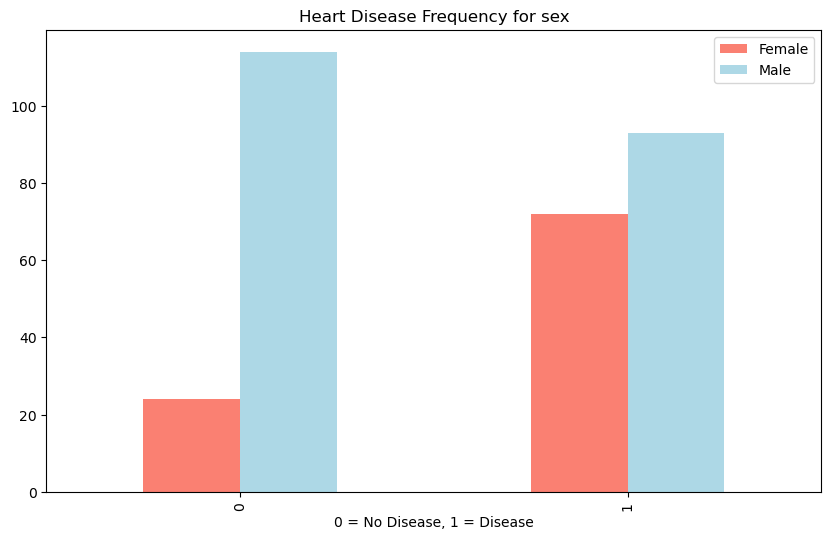

In [26]:
# Cross tab

pd.crosstab(df.target, df.sex).plot(kind="bar",figsize=(10,6), color=["salmon","lightblue"]);
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.legend(["Female", "Male"]);
plt.xticks()